# Root fit classifier


By Brady Lowe

lowebra2@isu.edu

9/02/2018


This Jupyter notebook is used to classify Root output images as either good (1) or bad (0) fits.
The results are output into a text file (classified_runs.txt) listing filenames that include a label.

## Load necessary packages

In [1]:
# Load some packages

# Keras packages for network
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, Conv2D, Flatten
from keras.models import Model
from keras.optimizers import Adam, SGD
# For saving model
from keras.models import model_from_json

# Some items for plotting and drawing
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt

# Need numpy
import numpy as np
import nn_utils

# Need os to change filenames
import os

%matplotlib inline

Using TensorFlow backend.


## Load root fit data from file

In [2]:
# Load dataset
x, y, filenames = nn_utils.load_dataset(im_dir="raw", return_filenames=True, log_scale=0)

# Grab dimensions of picture
(m, h, w, c) = x.shape
input_shape = h, w, c

# Print dimensions
print("(m, height, width, channels): (" + str(m) + ", " + str(h) + ", " + str(w) + ", " + str(c) + ")")

(m, height, width, channels): (1575, 236, 348, 3)


images/raw\fit_pmt_nn__chi1_runID517_fitID63_log0_gain371_hv1600_ll48_fitEngine0_low150_high150.png


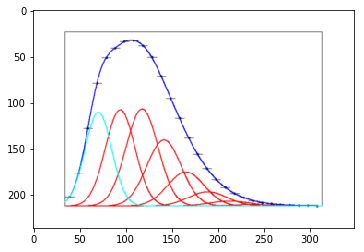

In [4]:
# Print an image
index = 78
print(filenames[index])
plt.imshow(np.uint8(nn_utils.get_printable_image(x[index])))

## Load trained network to use to classify fits

#### Load pretrained conv model

In [3]:
# load json and create model
json_file = open('trained/conv_model_best.json', 'r')
conv_model_json = json_file.read()
json_file.close()
model = model_from_json(conv_model_json)
# load weights into new model
model.load_weights("trained/conv_model_best.h5")
print("Loaded model from disk")

Loaded model from disk


#### Define optimizer, loss, and metrics. Compile model.

In [4]:
# Define optimizer
#opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.001)
opt = SGD(lr=1.0, decay=1e-6, momentum=0.9, nesterov=True)
# Define loss
loss = 'mean_squared_error'
# Define metrics to use
metrics=['acc']
# Compile model
model.compile(loss=loss, optimizer='sgd', metrics=metrics)
print("Model compiled")

Model compiled


## Calculate image classifications

In [5]:
# Perform classification, grab results vector
predictions = model.predict(x)


# Gather lists of indices
goods = []
bads = []
uncertains = []
differences = []

# Loop through all images
for i in range(m):
    # Sort the goods from bads
    if predictions[i] > 0.5:
        goods.append(i)
    else:
        bads.append(i)
    # Grab the uncertains
    if predictions[i] > 0.2 and predictions[i] < 0.8:
        uncertains.append(i)

# Calculate how many good/bad fits
print(str(len(goods)) + " good fits out of " + str(m) + " total")
        
# Print lists
#print("Bad fits:")
#print(str(bads))
#print("Uncertain fits:")
#print(str(uncertains))

1041 good fits out of 1575 total


### Look at an image

images/raw\fit_pmt_nn__chi17_runID526_fitID99_log0_gain39_hv1150_ll48_fitEngine0_low1_high1_predict1.png
classification: 1


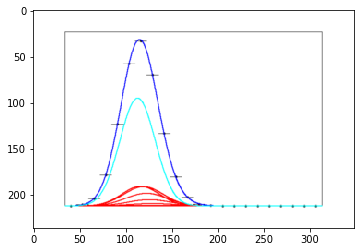

In [17]:
# Choose an index 
index = 47

# Grab data
this_filename = filenames[index]
classification = int(predictions[index] + 0.5)
this_image = x[index]

# Print labels for this index
print(this_filename)
print("classification: " + str(classification))

# Show image
plt.imshow(np.uint8(nn_utils.get_printable_image(this_image)))

## Affect changes

### Classify all images

In [6]:
# Loop through all images
for i in range(m):
    classification = int(predictions[i] + 0.5)
    nn_utils.classify_image(filenames[i], classification)

print("Image filenames changed, you should reload your dataset now.")

Image filenames changed, you should reload your dataset now.


In [31]:
# Change the files with difference predictions
for i in differences:
    nn_utils.change_label(filenames[i])

print("Image filenames changed, you should reload your dataset now.")

Image filenames changed, you should reload your dataset now.


#### Classify corresponding log plots

In [10]:
# Loop through all images
for i in range(m):
    classification = nn_utils.round(predictions[i])
    new_file = filenames[i].replace("log0", "log1")
    new_file = new_file[0:len(new_file) - 13] + ".png"
    nn_utils.classify_image(new_file, classification)

print("Log image filenames changed.")

Log image filenames changed.


### Classify images one by one (label)

#### Initialize loop

images/raw\fit_pmt_nn__chi0_runID511_fitID138_log0_gain775_hv1900_ll48_fitEngine0_low150_high150.png
classification: 1


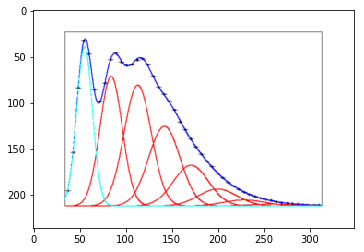

In [8]:
# Initialize
index = 0
# Grab data
classification = nn_utils.round(predictions[index])
print(filenames[index])
print("classification: " + str(classification))
plt.imshow(np.uint8(nn_utils.get_printable_image(x[index])))

#### Accept classification, and print next image

Image classified as 0
images/raw\fit_pmt_nn__chi177_runID524_fitID178_log0_gain436_hv1250_ll48_fitEngine0_low1_high1.png
classification: 0


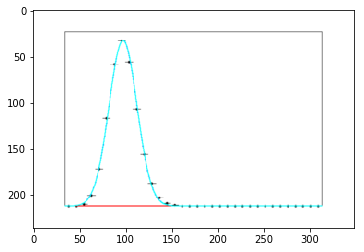

In [52]:
# Classify previous image
classification = nn_utils.round(predictions[index])
nn_utils.classify_image(filenames[index], classification)
print("Image classified as " + str(classification))
# Get next image
index += 1
print(filenames[index])
print("classification: " + str(classification))
plt.imshow(np.uint8(nn_utils.get_printable_image(this_image)))

#### Reject classification, and print next image

Image classified as 1
images/raw\fit_pmt_nn__chi17_runID519_fitID119_log0_gain289_hv1500_ll48_fitEngine0_low15_high15.png
classification: 1


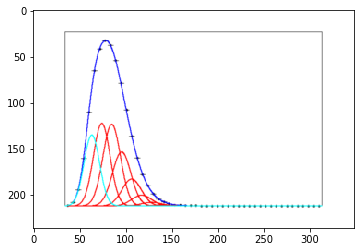

In [53]:
# Classify previous image
classification = nn_utils.round(predictions[index])
classification = 1 - classification
nn_utils.classify_image(filenames[index], classification)
print("Image classified as " + str(classification))
# Get next image
index += 1
print(filenames[index])
print("classification: " + str(classification))
plt.imshow(np.uint8(nn_utils.get_printable_image(this_image)))